In [ ]:
from keras.models import Model
from keras.layers import Dense,Input
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
encod_dim=64
input_img=Input(shape=(784,))
encoded=Dense(encod_dim,activation='relu')(input_img)

In [ ]:
decoded=Dense(784,activation='sigmoid')(encoded)
autoencoder=Model(input_img,decoded)

In [ ]:
encoder = Model(input_img, encoded)
encoded_input =Input(shape=(encod_dim,))
decoder_layer = autoencoder.layers[-1]


In [ ]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
Total params: 50240 (196.25 KB)
Trainable params: 50240 (196.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
decoder =Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 50960 (199.06 KB)
Trainable params: 50960 (199.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 5s 16ms/step - loss: 0.2427 - val_loss: 0.1620
Epoch 2/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1434 - val_loss: 0.1264
Epoch 3/50
235/235 [==============================] - 7s 30ms/step - loss: 0.1179 - val_loss: 0.1083
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1039 - val_loss: 0.0977
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0950 - val_loss: 0.0903
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0887 - val_loss: 0.0851
Epoch 7/50
235/235 [==============================] - 4s 15ms/step - loss: 0.0842 - val_loss: 0.0816
Epoch 8/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0811 - val_loss: 0.0791
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0790 - val_loss: 0.0775
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0776 - val_lo

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


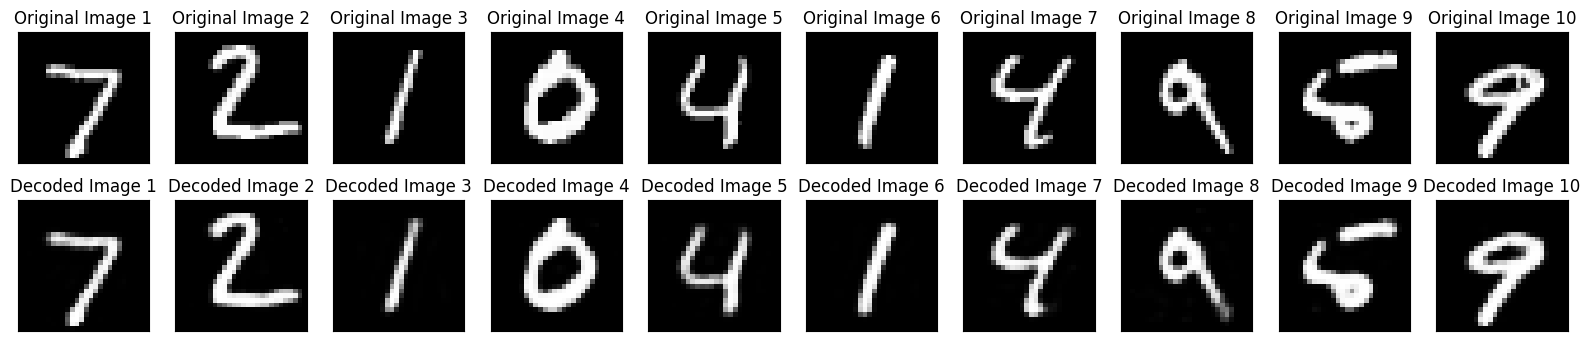

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f"Original Image {i + 1}")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f"Decoded Image {i + 1}")

plt.show()